In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset with low_memory=False to avoid DtypeWarning
file_path = 'D:/Inheritance Projects/Loan Project/loan.csv'
print("Loading the dataset...")
loan_data = pd.read_csv(file_path, low_memory=False)
print("Dataset loaded successfully...")

Loading the dataset...
Dataset loaded successfully...


In [3]:
# Displaying the dimensions of the dataset
print(f"Dataset dimensions: {loan_data.shape}")

# Displaying the first few rows of the dataset
print("\nPreview of the dataset:")
print(loan_data.head())

# Checking the data types of the columns
print("\nChecking the data types of the columns...")
print(loan_data.dtypes)

Dataset dimensions: (39717, 111)

Preview of the dataset:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankrupt

In [4]:
# Checking for missing values
print("Checking for missing values...")
missing_values = loan_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Checking for missing values...
Missing values in each column:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [5]:
# Function to calculate percentage of missing values in each column
def missing_percentage(df):
    missing_values = df.isnull().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values.sum()
    return (total_missing / total_cells) * 100

# Calculate missing percentages
missing_percentages = loan_data.isnull().sum() / len(loan_data) * 100

# Define threshold for missing values
threshold = 50

# Identify columns with more than threshold% missing values
columns_to_drop = missing_percentages[missing_percentages > threshold].index

In [6]:
# Drop columns with more than threshold% missing values
loan_data_cleaned = loan_data.drop(columns_to_drop, axis=1)

# Display dimensions of the cleaned dataset
print("Cleaned dataset dimensions after dropping columns with >{}% missing values:".format(threshold), loan_data_cleaned.shape)



Cleaned dataset dimensions after dropping columns with >50% missing values: (39717, 54)


In [7]:
# Separate numeric and non-numeric columns
numeric_columns = loan_data_cleaned.select_dtypes(include=[np.number])
non_numeric_columns = loan_data_cleaned.select_dtypes(exclude=[np.number])

In [8]:
# Handle missing values for numeric data using median imputation
print("Handling missing values for numeric data using median imputation...")
numeric_imputer = SimpleImputer(strategy='median')
numeric_data_cleaned = pd.DataFrame(numeric_imputer.fit_transform(numeric_columns), columns=numeric_columns.columns, index=loan_data_cleaned.index)
print("Missing values for numeric data are successfully handled...")
print("Dimension of cleaned numeric data: ", numeric_data_cleaned.shape)
print("Missing values of non-numeric data: ", numeric_data_cleaned.isnull().sum())

Handling missing values for numeric data using median imputation...
Missing values for numeric data are successfully handled...
Dimension of cleaned numeric data:  (39717, 31)
Missing values of non-numeric data:  id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths

In [9]:
# Handle missing values for non-numeric data using most frequent (mode) imputation
print("Handling missing values for non-numeric data using most frequent (mode) imputation...")
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
non_numeric_data_cleaned = pd.DataFrame(non_numeric_imputer.fit_transform(non_numeric_columns), columns=non_numeric_columns.columns, index=loan_data_cleaned.index)

print("Missing values for non-numeric data are successfully handled...")
print("Dimension of the cleaned non-numeric data: ", non_numeric_data_cleaned.shape)
print("Missing values of non-numeric data: ", non_numeric_data_cleaned.isnull().sum())

Handling missing values for non-numeric data using most frequent (mode) imputation...
Missing values for non-numeric data are successfully handled...
Dimension of the cleaned non-numeric data:  (39717, 23)
Missing values of non-numeric data:  term                   0
int_rate               0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
desc                   0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
revol_util             0
initial_list_status    0
last_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64


In [10]:
# Combining the cleaned numeric and non-numeric data
loan_data_cleaned = pd.concat([numeric_data_cleaned, non_numeric_data_cleaned], axis=1)


In [11]:
# Display dimensions of the final cleaned dataset
print("Final cleaned dataset dimensions:", loan_data_cleaned.shape)

Final cleaned dataset dimensions: (39717, 54)


In [12]:
# Checking for missing values after cleaning
print("Checking for missing values after cleaning...")
missing_values_cleaned = loan_data_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values_cleaned)

Checking for missing values after cleaning...
Missing values in each column:
 id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt               

In [13]:
# Correcting data types: Converting percentage strings to float
if 'int_rate' in loan_data_cleaned.columns:
    print("\nConverting percentage strings to float in 'int_rate' column...")
    loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float') / 100

print("Correction of data types happened successfully...")



Converting percentage strings to float in 'int_rate' column...
Correction of data types happened successfully...


In [14]:
# Excluding 'Current' loans from the dataset if applicable
if 'loan_status' in loan_data_cleaned.columns:
    print("\nExcluding 'Current' loans from the dataset...")
    loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['loan_status'] != 'Current']
    print("Remaining loan statuses:\n", loan_data_cleaned['loan_status'].value_counts())



Excluding 'Current' loans from the dataset...
Remaining loan statuses:
 Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


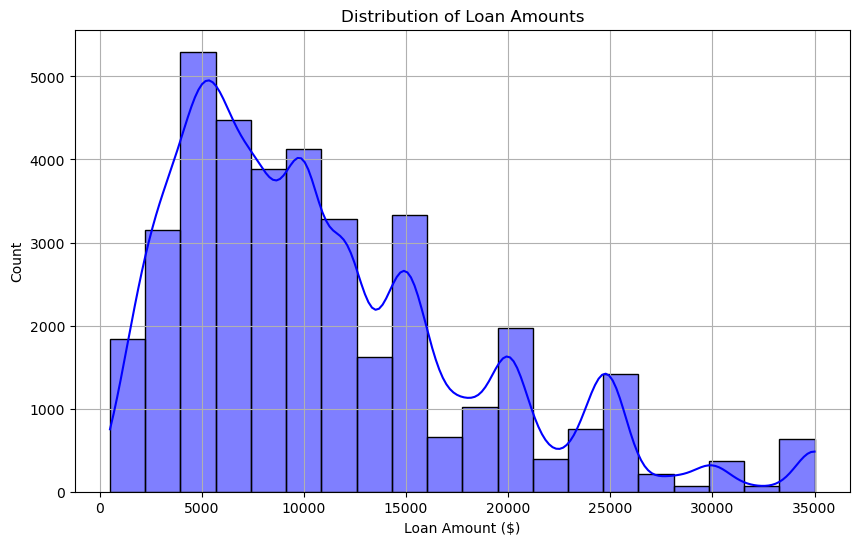

In [15]:
# Exploratory Data Analysis (EDA)
# Histogram of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

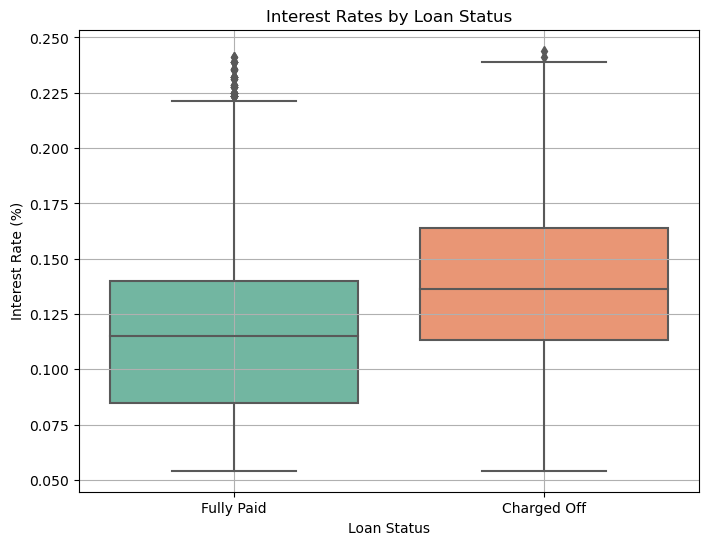

In [16]:
#Boxplot of interest rates by loan status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned, palette='Set2')
plt.title('Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

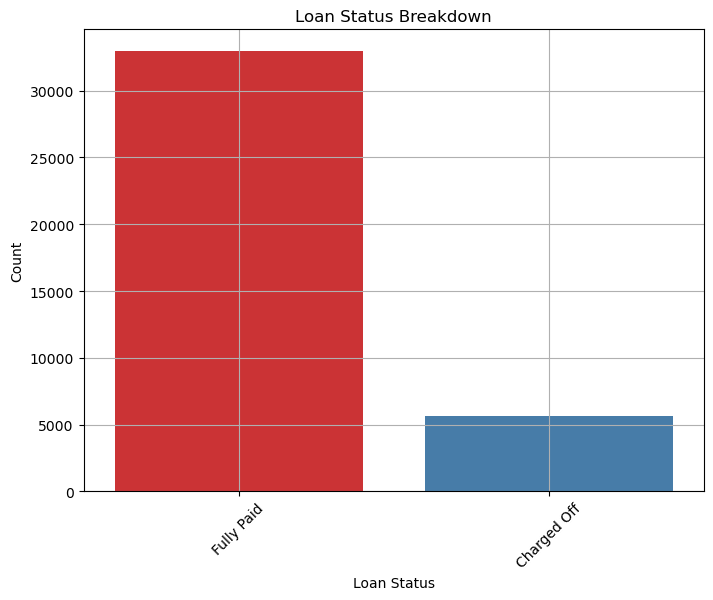

In [17]:
# Loan status breakdown
plt.figure(figsize=(8, 6))
loan_status_counts = loan_data_cleaned['loan_status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='Set1')
plt.title('Loan Status Breakdown')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

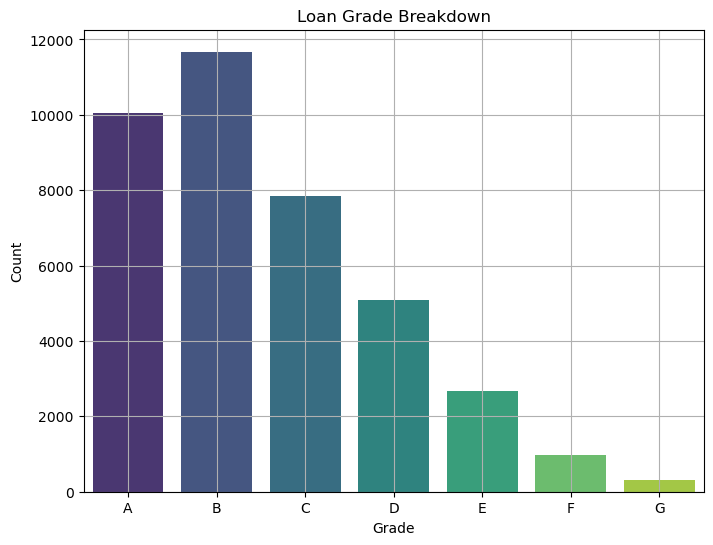

In [18]:
# Loan grade breakdown
plt.figure(figsize=(8, 6))
grade_counts = loan_data_cleaned['grade'].value_counts().sort_index()
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='viridis')
plt.title('Loan Grade Breakdown')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(True)
plt.show()

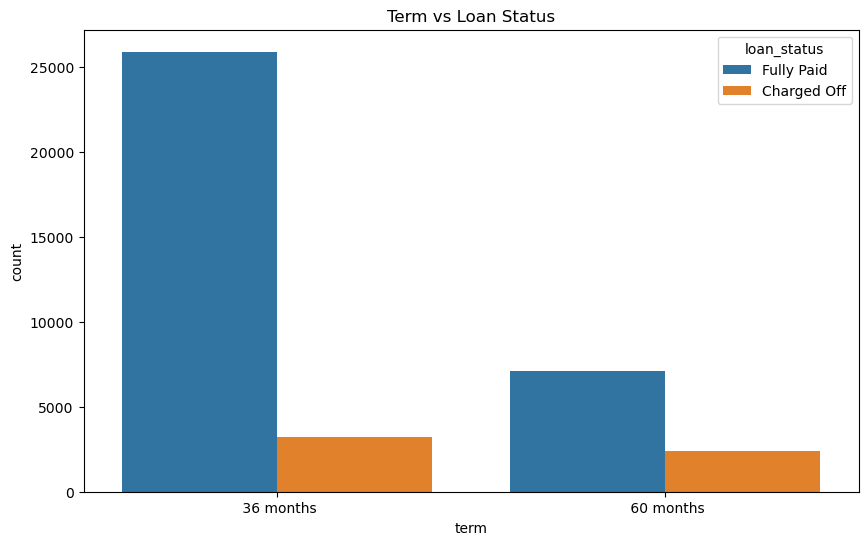

In [19]:
# Count plot for term vs loan_status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data_cleaned)
plt.title('Term vs Loan Status')
plt.show()

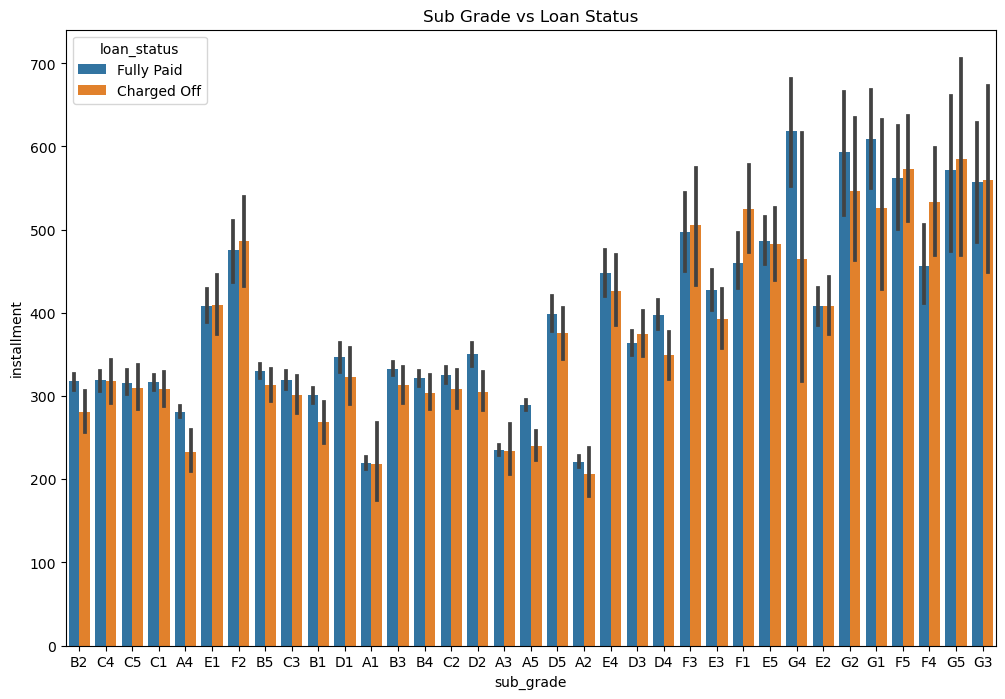

In [20]:
# Bar plot for sub_grade vs loan_status
plt.figure(figsize=(12, 8))
sns.barplot(x='sub_grade', y='installment', hue='loan_status', data=loan_data_cleaned)
plt.title('Sub Grade vs Loan Status')
plt.show()

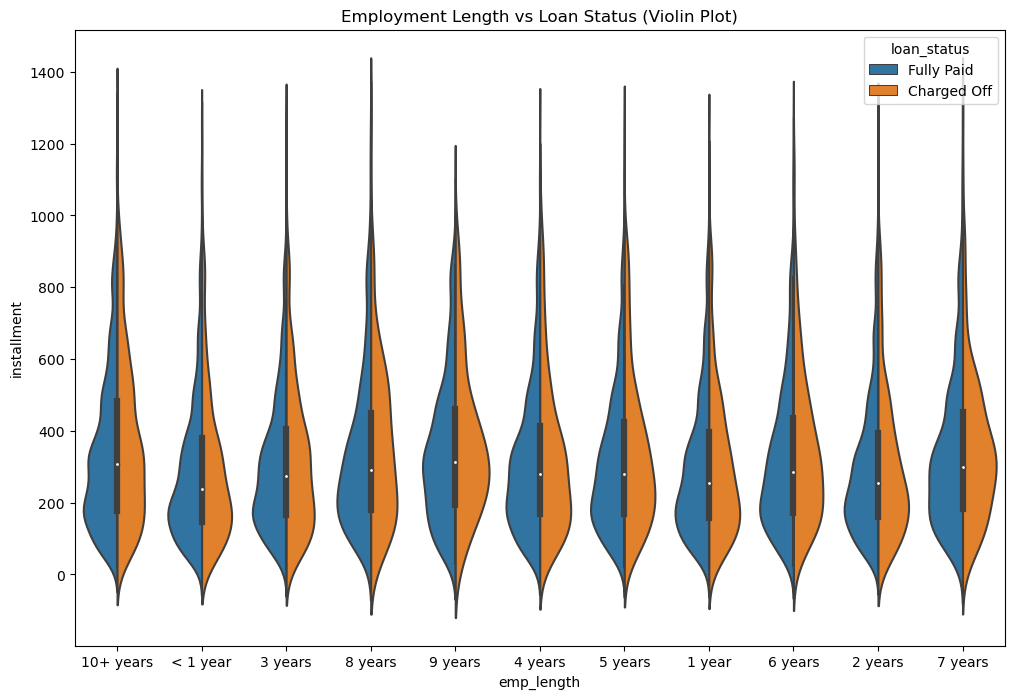

In [21]:
# Violin plot for emp_length vs loan_status
plt.figure(figsize=(12, 8))
sns.violinplot(x='emp_length', y='installment', hue='loan_status', data=loan_data_cleaned, split=True)
plt.title('Employment Length vs Loan Status (Violin Plot)')
plt.show()

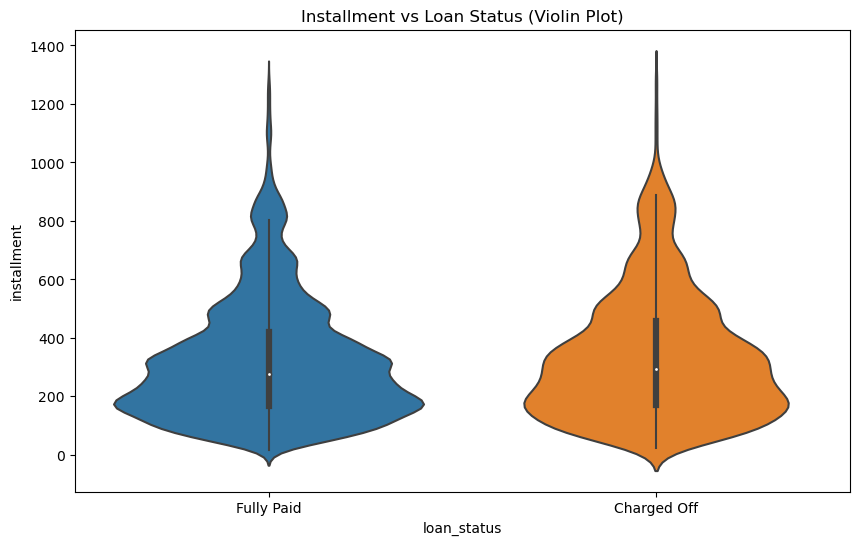

In [22]:
# Violin plot for installment vs loan_status
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='installment', data=loan_data_cleaned)
plt.title('Installment vs Loan Status (Violin Plot)')
plt.show()

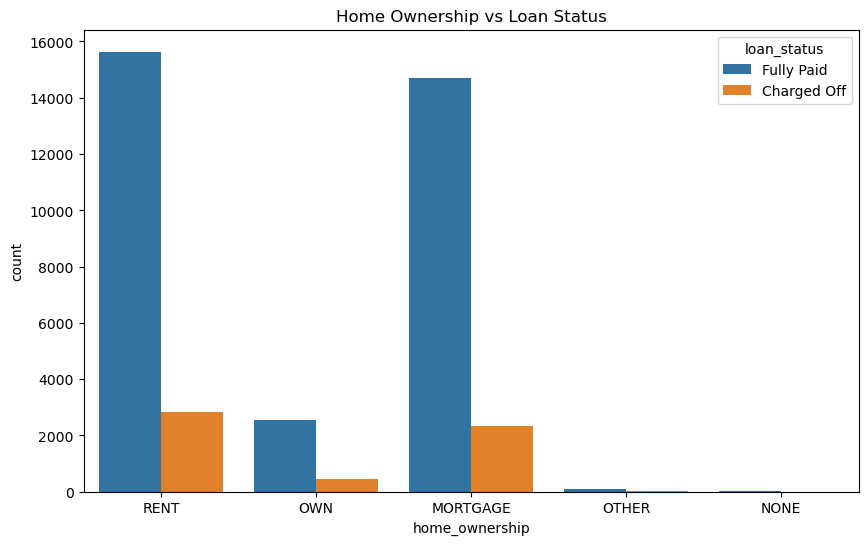

In [23]:
# Count plot for home_ownership vs loan_status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_cleaned)
plt.title('Home Ownership vs Loan Status')
plt.show()

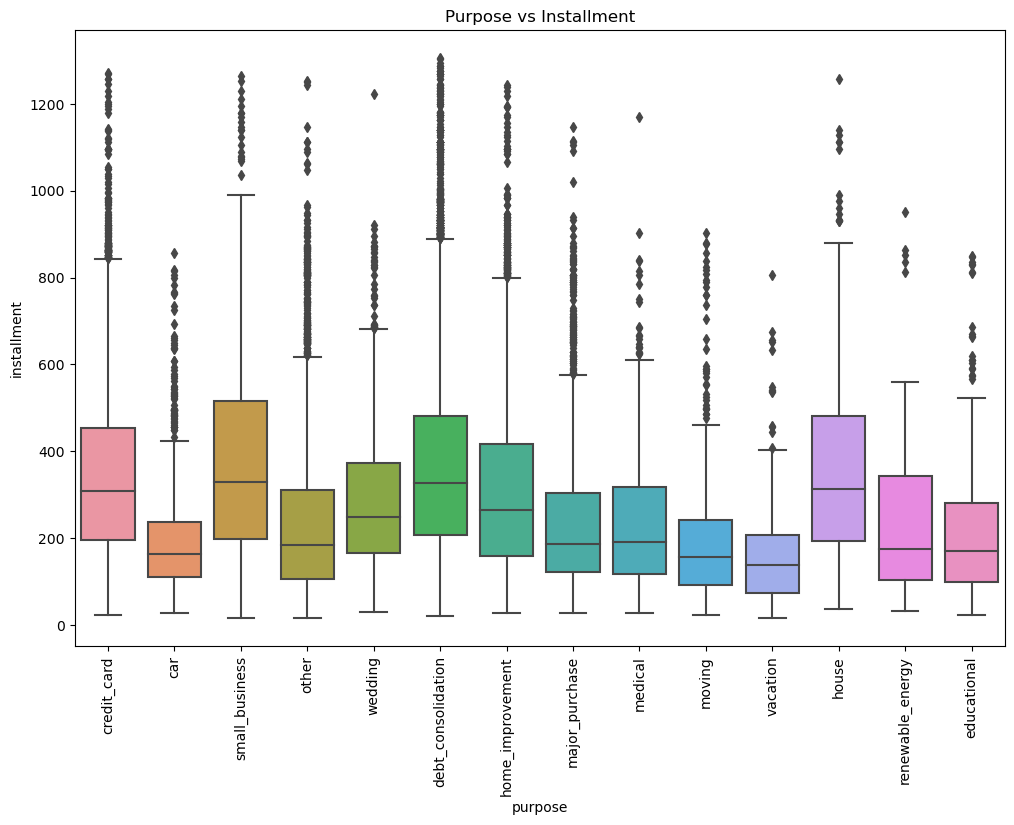

In [24]:
# Box plot for purpose vs installment
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='installment', data=loan_data_cleaned)
plt.title('Purpose vs Installment')
plt.xticks(rotation=90)
plt.show()

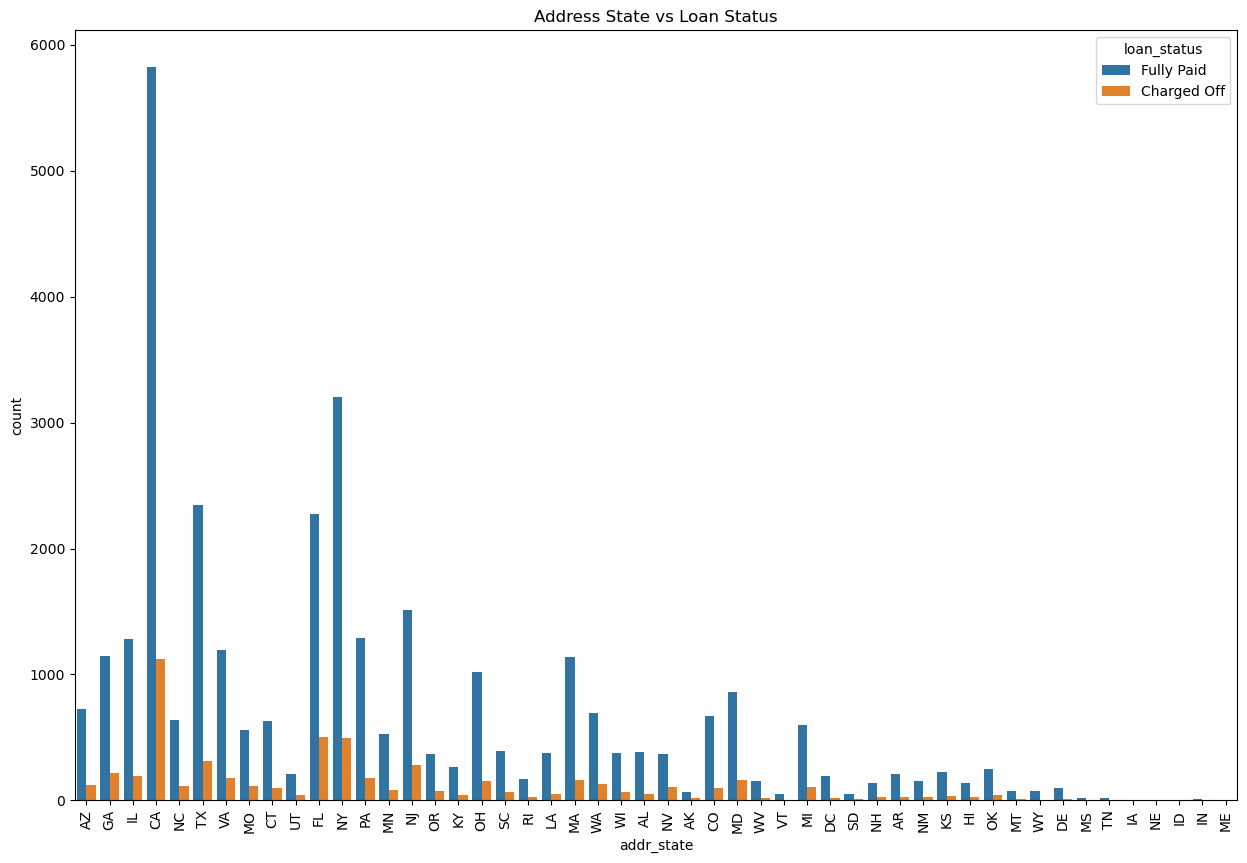

In [25]:
# Count plot for addr_state vs loan_status
plt.figure(figsize=(15, 10))
sns.countplot(x='addr_state', hue='loan_status', data=loan_data_cleaned)
plt.title('Address State vs Loan Status')
plt.xticks(rotation=90)
plt.show()

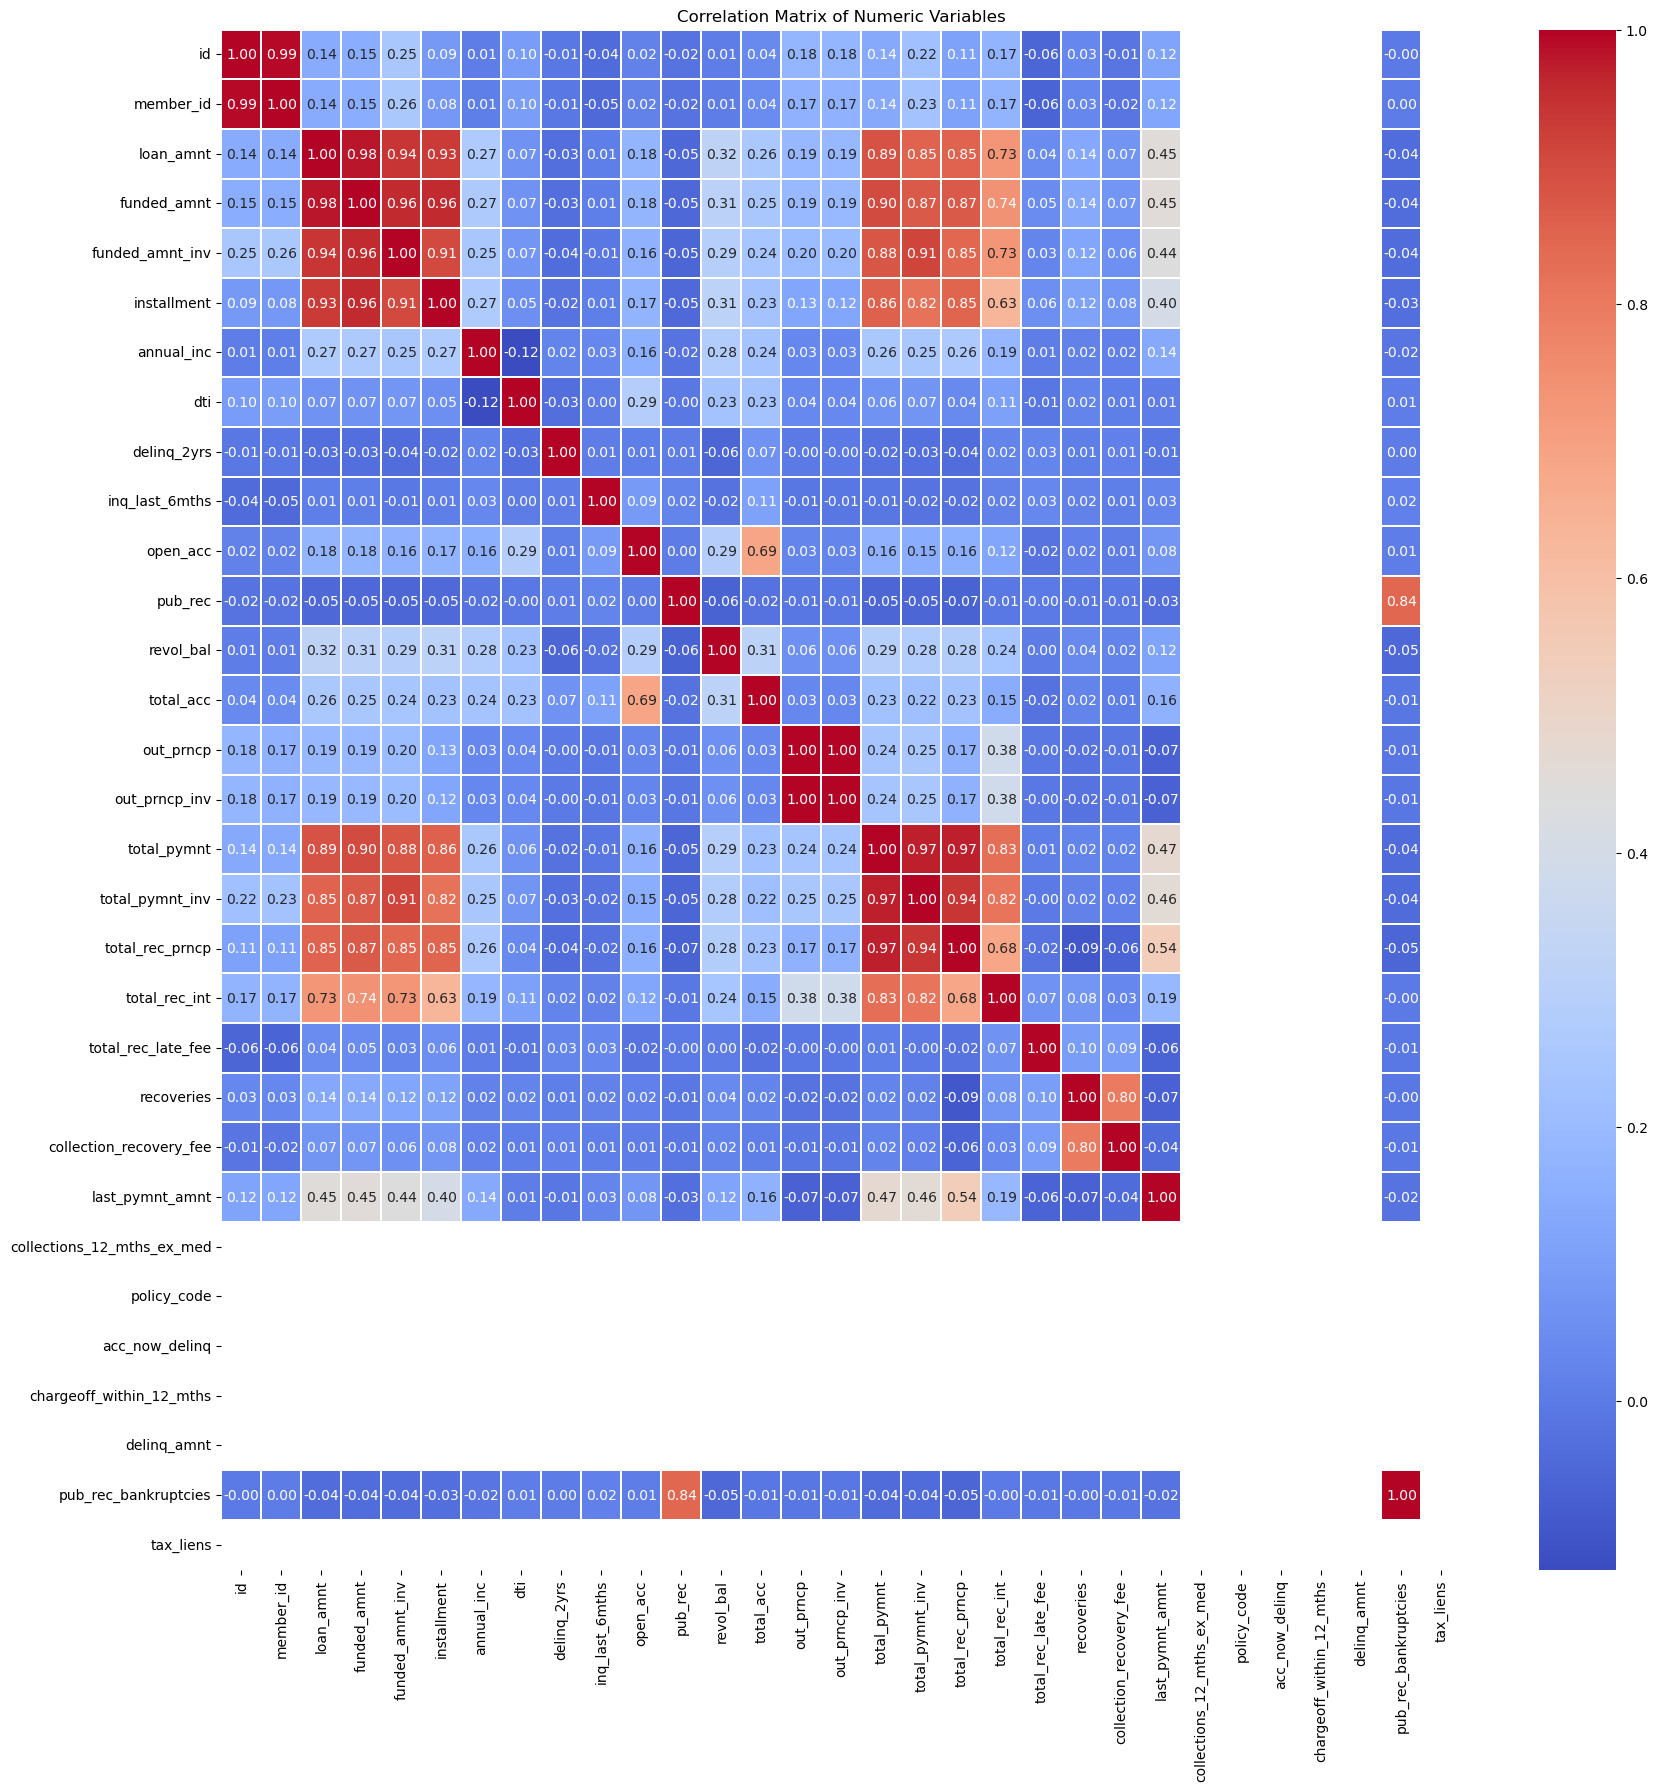

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.000569,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,0.000809,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.036284,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.037636,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.037982,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.033746,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016514,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.007021,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.002954,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.015652,NaN


In [46]:
# Correlation matrix of numeric variables
plt.figure(figsize=(20, 20))
corr_matrix = numeric_data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()
corr_matrix

In [33]:
# Create a copy of the cleaned dataset to avoid modifying the original data
encoded_data = loan_data_cleaned.copy()

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in ['term', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'purpose', 'title', 'addr_state']:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

# Convert loan_status to a binary variable for correlation purposes
encoded_data['loan_status'] = encoded_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [34]:
# Calculate the correlation matrix
corr_matrix_encoded = encoded_data.corr()

# Display the correlation of each variable with the target variable 'loan_status'
corr_with_target = corr_matrix_encoded['loan_status'].sort_values(ascending=False)
print("Correlation with loan_status:\n", corr_with_target)

Correlation with loan_status:
 loan_status                   1.000000
recoveries                    0.339562
int_rate                      0.211390
sub_grade                     0.205320
collection_recovery_fee       0.204914
term                          0.173487
total_rec_late_fee            0.165115
inq_last_6mths                0.071878
loan_amnt                     0.059463
funded_amnt                   0.056497
pub_rec                       0.051001
title                         0.050793
pub_rec_bankruptcies          0.046989
dti                           0.045078
id                            0.042390
purpose                       0.041831
member_id                     0.039798
funded_amnt_inv               0.037781
emp_title                     0.033050
installment                   0.027153
home_ownership                0.023099
delinq_2yrs                   0.020096
total_rec_int                 0.013008
revol_bal                     0.005854
open_acc                     -0.0

C:\Users\Dell\AppData\Local\Temp\ipykernel_8208\1057396259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_encoded = encoded_data.corr()


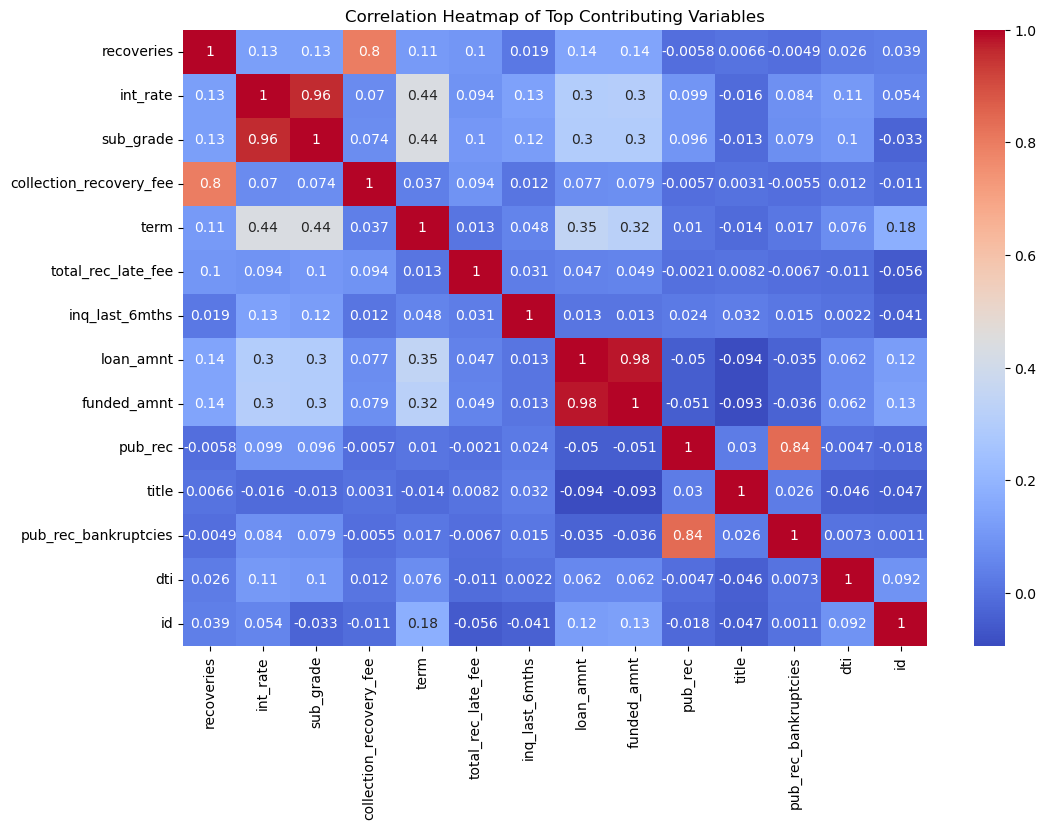

In [39]:
# Top contributing variables based on correlation with 'loan_status'
top_contributors = corr_with_target.index[1:15]  # Exclude 'loan_status' itself

# Plotting correlation heatmap for top contributing variables
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data[top_contributors].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Contributing Variables')
plt.show()

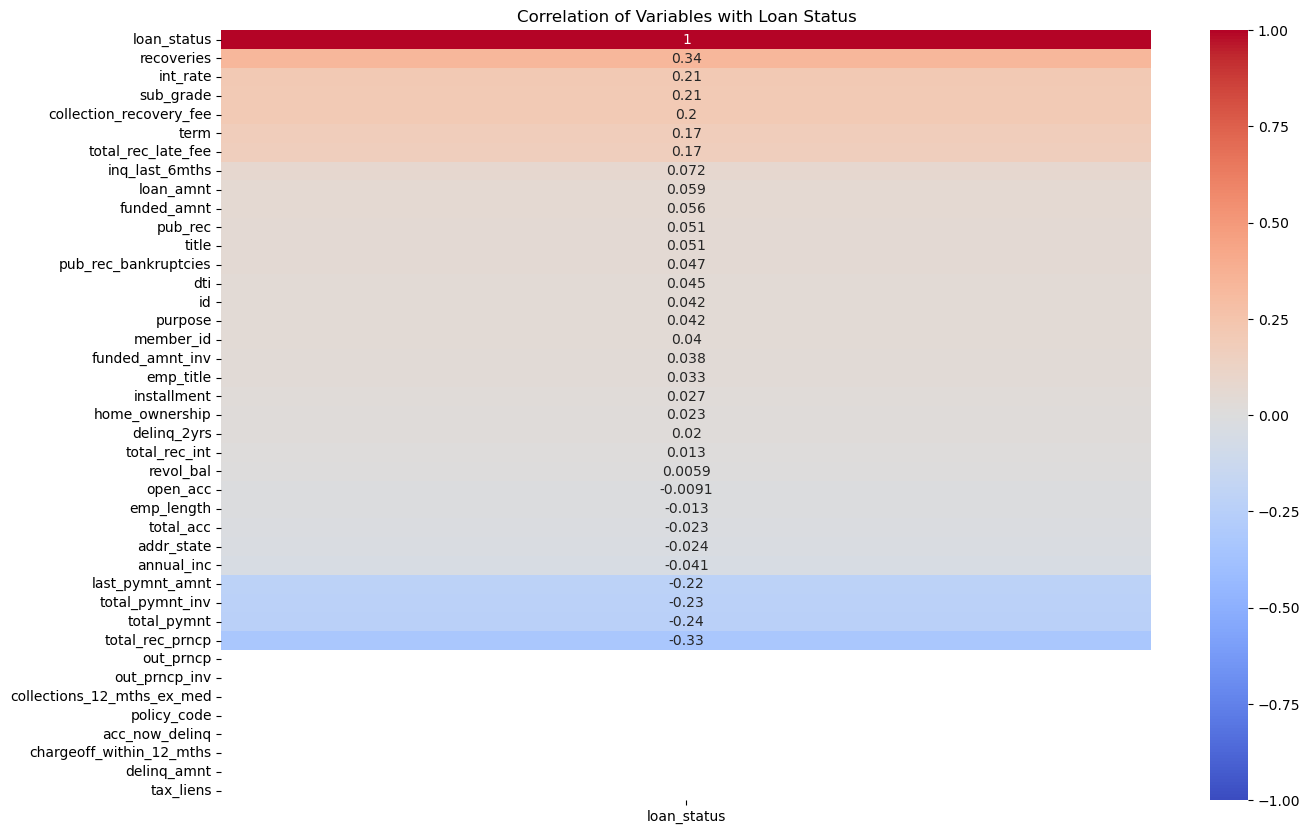

In [38]:
# Correlation heatmap of all variables with the target variable 'loan_status'
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_encoded[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Variables with Loan Status')
plt.show()

In [40]:
## Statistical Summaries

# Summary statistics by loan status
summary_stats = loan_data_cleaned.groupby('loan_status').agg({'loan_amnt': ['mean', 'median', 'max', 'min'],
                                                              'int_rate': ['mean', 'median', 'max', 'min'],
                                                              'annual_inc': ['mean', 'median', 'max', 'min']})
print("\nSummary Statistics by Loan Status:")
summary_stats



Summary Statistics by Loan Status:


loan_amnt                           int_rate                  \
                     mean   median      max    min      mean  median     max   
loan_status                                                                    
Charged Off  12104.385108  10000.0  35000.0  900.0  0.138204  0.1361  0.2440   
Fully Paid   10866.455994   9600.0  35000.0  500.0  0.116098  0.1149  0.2411   

                       annual_inc                              
                min          mean   median        max     min  
loan_status                                                    
Charged Off  0.0542  62427.298034  53000.0  1250000.0  4080.0  
Fully Paid   0.0542  69862.503328  60000.0  6000000.0  4000.0